<a href="https://colab.research.google.com/github/simulate111/Computer-Vision-and-Sensor-Fusion/blob/main/Assignment_1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import random
import os
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

### Path system

In [ ]:
# you need the current working directory NB: works both windows and linux
current_working_directory = os.getcwd()
current_working_directory = os.path.dirname(current_working_directory)

# get the directory where I want to download the dataset
path_of_download = os.path.join(*['..', current_working_directory, 'Datasets', 'cookies_vs_chihuahua'])
print(f"[DIR] The directory of the current dataset is {path_of_download}")

[DIR] The directory of the current dataset is C:\Users\moakht\OneDrive - O365 Turun yliopisto\Desktop\Courses\UTU\Computer Vision and Sensor Fusion\Datasets\cookies_vs_chihuahua


### Dataset function

In [ ]:
# here let s do some functions that we can re-use also for other assignment
def load_the_data_and_the_labels(data_set_path: str, target_size: tuple or None = None):
    try:
        dataset, labels, name_of_the_labels = list(), list(), list()
        # let s loop here and we try to discover how many class we have
        for class_number, class_name in enumerate(os.listdir(data_set_path)):
            full_path_the_data = os.path.join(data_set_path, class_name)
            print(f"[WALK] I am walking into {full_path_the_data}")

            # add the list to nam _list
            name_of_the_labels.append(class_name)

            for single_image in os.listdir(f"{full_path_the_data}"):
                full_path_to_image = os.path.join(*[full_path_the_data, single_image])

                # add the class number
                labels.append(class_number)

                if target_size is None:
                    # let s load the image
                    image = tf.keras.utils.load_img(full_path_to_image)
                else:
                    image = tf.keras.utils.load_img(full_path_to_image, target_size=target_size)

                # transform PIL object in image
                image = tf.keras.utils.img_to_array(image)

                # add the image to the ds list
                dataset.append(image)

        return np.array(dataset, dtype='uint8'), np.array(labels, dtype='int'), name_of_the_labels
    except Exception as ex:
        print(f"[EXCEPTION] load the data and the labels throws exceptions {ex}")

### load train set

In [ ]:
train_data_path = os.path.join(path_of_download, "train")
train_dataset, train_labels, train_class_names = load_the_data_and_the_labels(train_data_path, (224, 224, 3))

[WALK] I am walking into C:\Users\moakht\OneDrive - O365 Turun yliopisto\Desktop\Courses\UTU\Computer Vision and Sensor Fusion\Datasets\cookies_vs_chihuahua\train\chihuahua
[WALK] I am walking into C:\Users\moakht\OneDrive - O365 Turun yliopisto\Desktop\Courses\UTU\Computer Vision and Sensor Fusion\Datasets\cookies_vs_chihuahua\train\muffin


### load test set

In [ ]:
test_data_path = os.path.join(path_of_download, "test")
test_dataset, test_labels, test_class_names = load_the_data_and_the_labels(test_data_path, (224, 224, 3))

[WALK] I am walking into C:\Users\moakht\OneDrive - O365 Turun yliopisto\Desktop\Courses\UTU\Computer Vision and Sensor Fusion\Datasets\cookies_vs_chihuahua\test\chihuahua
[WALK] I am walking into C:\Users\moakht\OneDrive - O365 Turun yliopisto\Desktop\Courses\UTU\Computer Vision and Sensor Fusion\Datasets\cookies_vs_chihuahua\test\muffin


### normalize the data

In [ ]:
train_dataset = train_dataset / 255.0
test_dataset = test_dataset / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset, train_labels, test_size=0.3)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (3313, 224, 224, 3)
Test data shape: (1420, 224, 224, 3)


### create a cnn with the following characteristics:
a.	Input layer
b.	Data augmentation, with random flip and random rotation.
c.	Two hidden layers each composed with the following characteristics: 16 conv2d units, max pooling 2d and batch normalization, the second one should have 24 conv2d units max pooling 2d and batch normalization.
d.	After this, add a flatten layer and a dense layer with 8 units
e.	Add the final classifier (a  dense layer) with the correct number of output and activation


In [ ]:
#Model
cnn_model = models.Sequential()

#a
cnn_model.add(layers.InputLayer(shape=(224, 224, 3)))

#b
cnn_model.add(layers.RandomFlip("horizontal"))
cnn_model.add(layers.RandomRotation(0.2))

#c
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.BatchNormalization())

cnn_model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.BatchNormalization())

#d
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(8, activation='relu'))

#e
cnn_model.add(layers.Dense(1, activation='sigmoid'))

### compile the model using Adam

In [ ]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model with batch size 64 and epochs of 30

In [ ]:
cnn_model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 425ms/step - accuracy: 0.6967 - loss: 0.7873 - val_accuracy: 0.5204 - val_loss: 2.8090
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 381ms/step - accuracy: 0.8543 - loss: 0.3653 - val_accuracy: 0.5246 - val_loss: 3.7057
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 378ms/step - accuracy: 0.8715 - loss: 0.3266 - val_accuracy: 0.5254 - val_loss: 6.2057
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 393ms/step - accuracy: 0.8741 - loss: 0.3147 - val_accuracy: 0.5261 - val_loss: 4.8979
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.8609 - loss: 0.3345 - val_accuracy: 0.5254 - val_loss: 6.7735
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 24s 459ms/step - accuracy: 0.8987 - loss: 0.2485 - val_accuracy: 0.5359 - val_loss: 3.5104
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 547ms/step - accuracy: 0.8963 - loss: 0.2605 - val_accuracy: 0.5535 - val_loss: 3.4175
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 515ms/step - accuracy: 0.8944 - loss: 0.2451 - val_accu

### Evaluate the model and report the accuracy.

In [ ]:
print('Accuracy', cnn_model.evaluate(test_dataset, test_labels)[1])

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9135 - loss: 0.2218
Accuracy 0.8521959185600281


#### Make prediction with the test set and use a threshold of 0.5 as boundaries decision between the classes.

In [ ]:
predicted_classes = (cnn_model.predict(test_dataset) > 0.5).astype(int)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


### plot confusion matrix and ROC curve

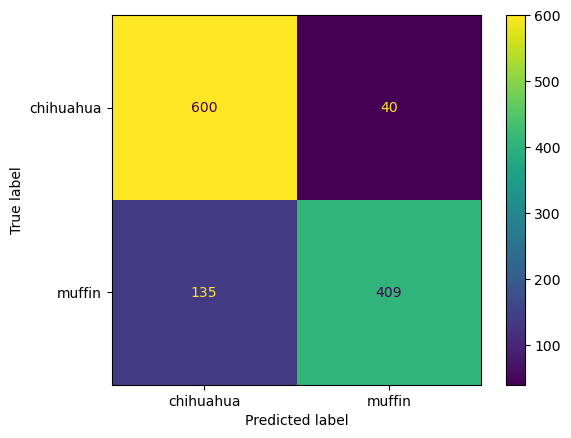

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_classes), display_labels=test_class_names).plot()

ROC: 0.8446691176470589


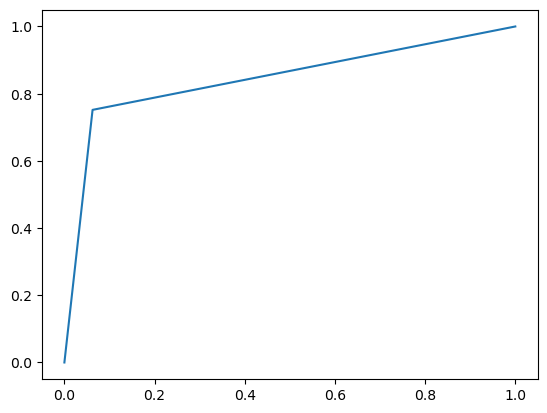

In [ ]:
fpr, tpr, _ = roc_curve(test_labels, predicted_classes)
plt.plot(fpr, tpr)
print('ROC:', auc(fpr, tpr))

### Calcualte best tresthold

In [ ]:
precision, recall, thresholds = precision_recall_curve(test_labels, cnn_model.predict(test_dataset))
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


### Plot confusion matrix

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


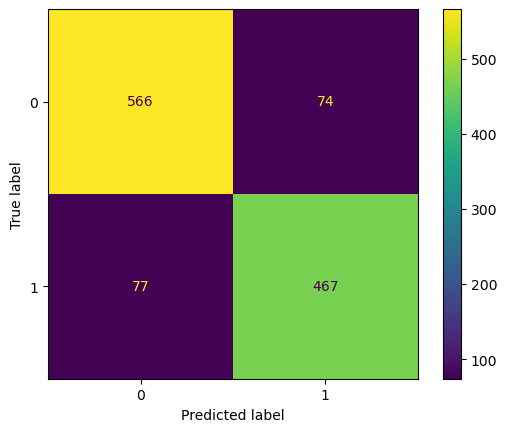

In [ ]:
best_predicted_classes = (cnn_model.predict(test_dataset) > best_threshold).astype(int)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, best_predicted_classes)).plot()